# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
sales_train_df = pd.read_csv('train.csv')

C:\Users\Matthew\AppData\Local\Temp\ipykernel_6536\1244316221.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


In [3]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
sales_train_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [5]:
# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

#- Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

In [6]:
store_info_df = pd.read_csv('store.csv')

In [7]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [9]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# EDA

<Axes: >

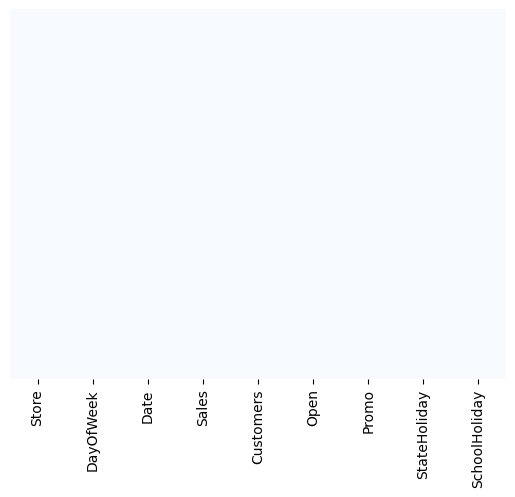

In [10]:
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

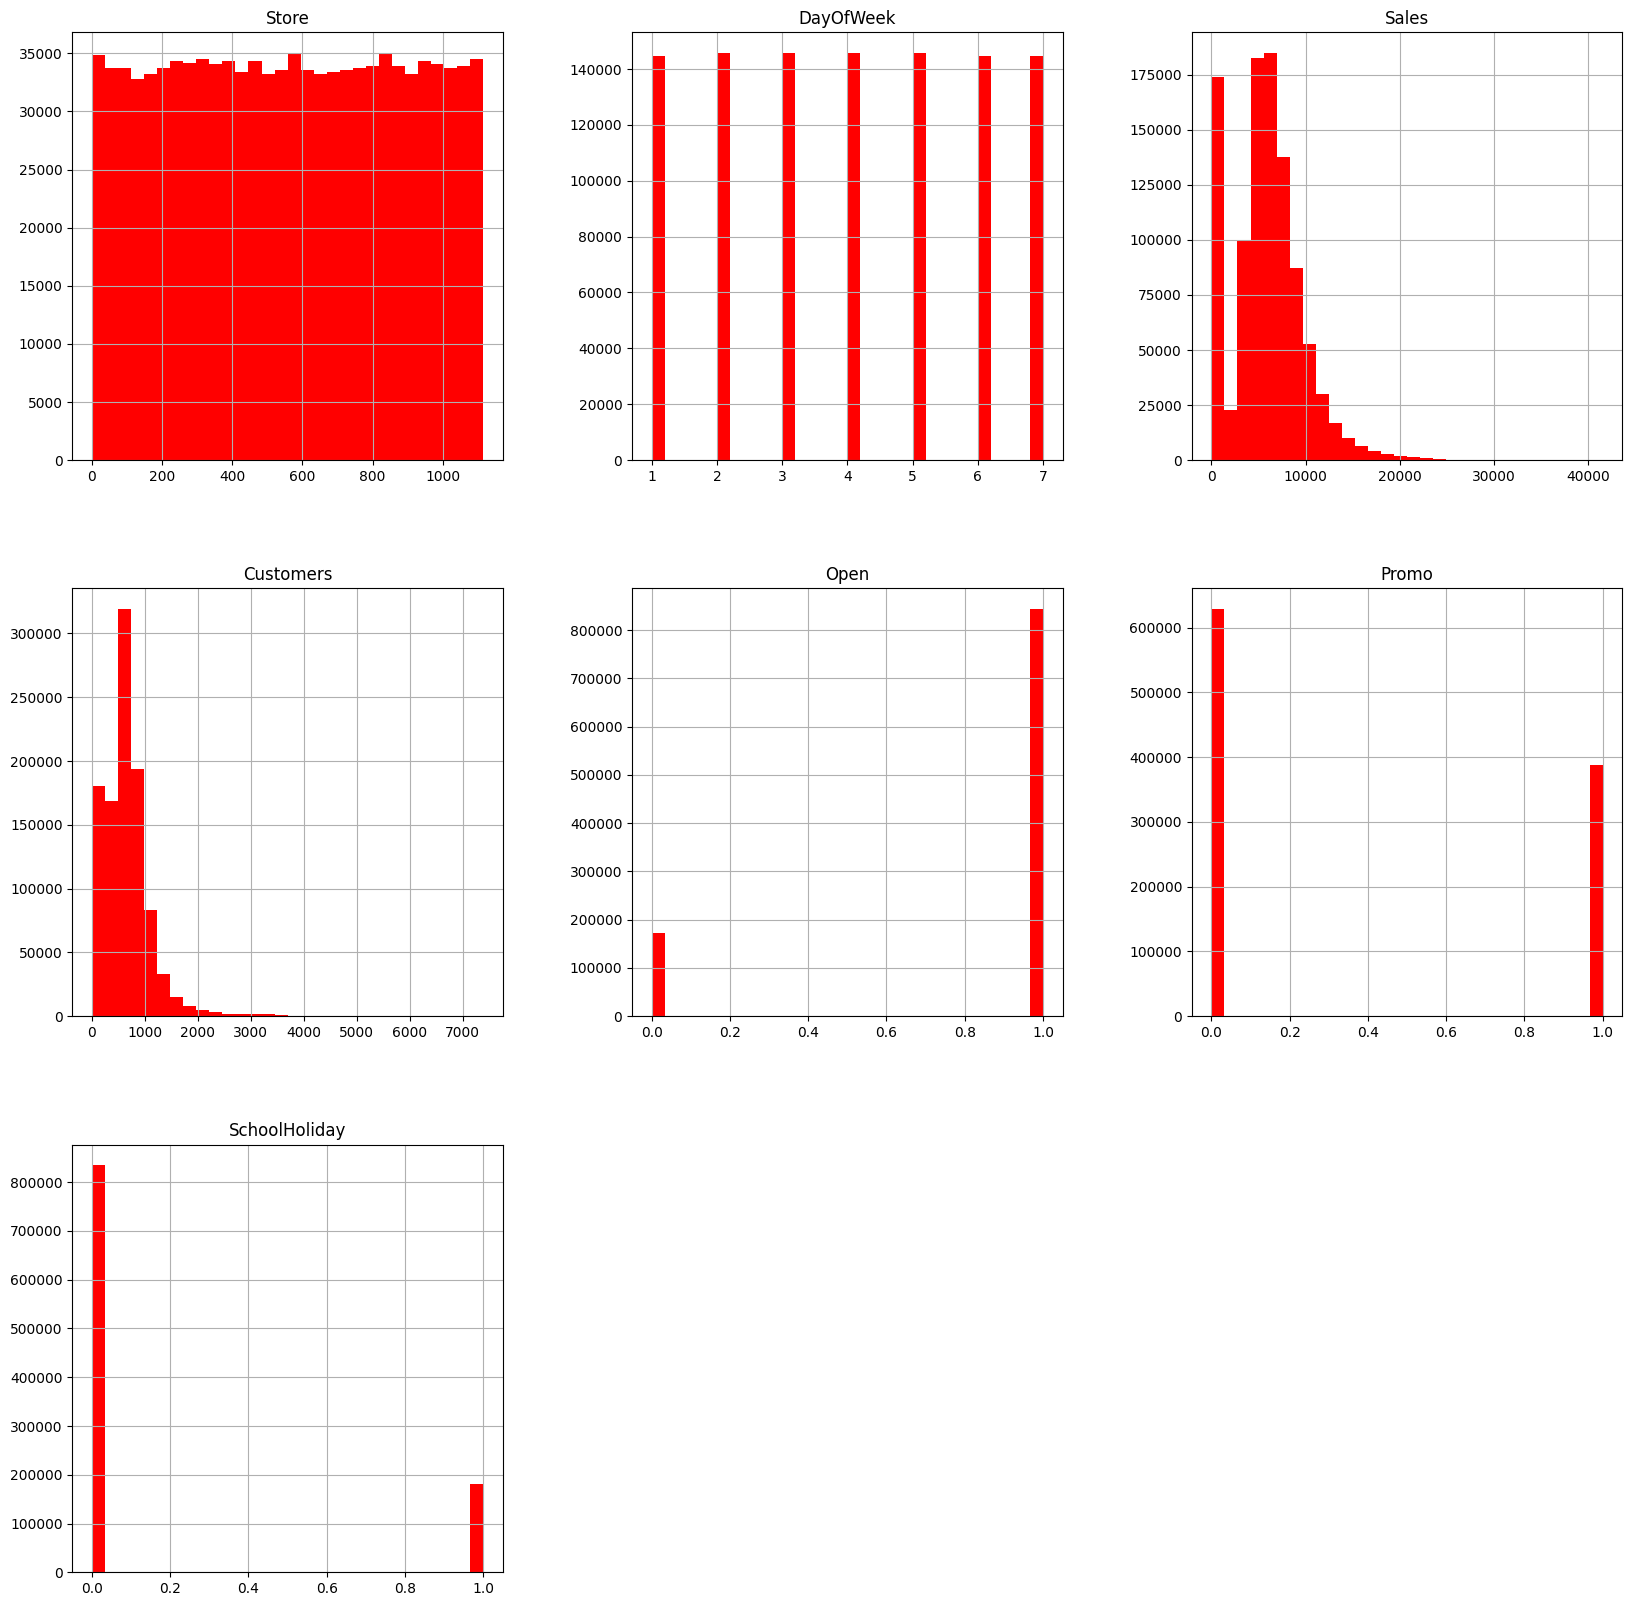

In [11]:
from turtle import color


sales_train_df.hist(bins=30,
                    figsize=(20,20),
                    color='red')

In [12]:
sales_train_df['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [13]:
# Keeping open stores, removing closed stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [14]:
# Drop 'open' column

sales_train_df.drop(['Open'], axis=1, inplace=True)

In [15]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


## EDA for Stores (store info)

<Axes: >

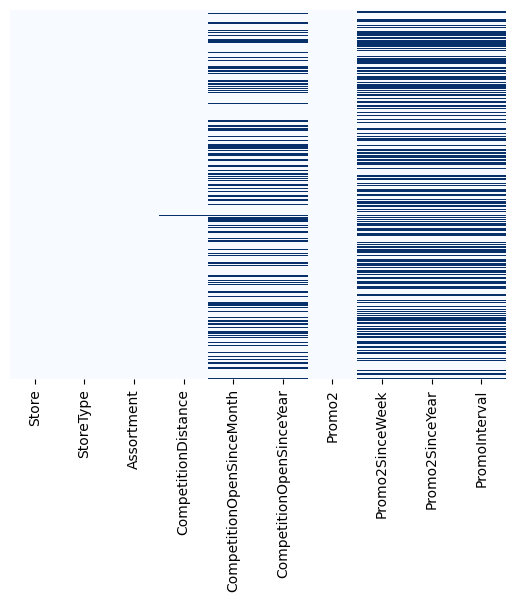

In [16]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [17]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [18]:
# Look at Promo2 reliant columns
store_info_df[store_info_df['Promo2'] == 0]
## Promo2 reliant columns can be set to 0 instead, it is not NaN

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


### Replacing null values

In [19]:
str_cols = ['Promo2SinceWeek',
            'Promo2SinceYear',
            'PromoInterval',
            'CompetitionOpenSinceYear',
            'CompetitionOpenSinceMonth']

for str in str_cols:
    store_info_df[str] = store_info_df[str].fillna(0)

<Axes: >

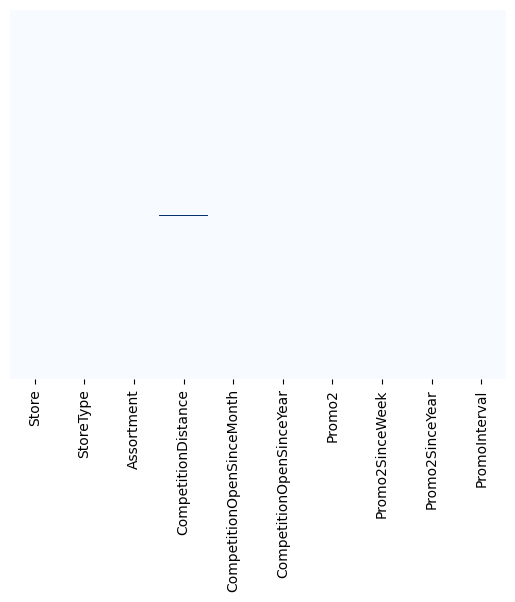

In [20]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [21]:
# Use average to fill in missing value
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

C:\Users\Matthew\AppData\Local\Temp\ipykernel_6536\2241286013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)


<Axes: >

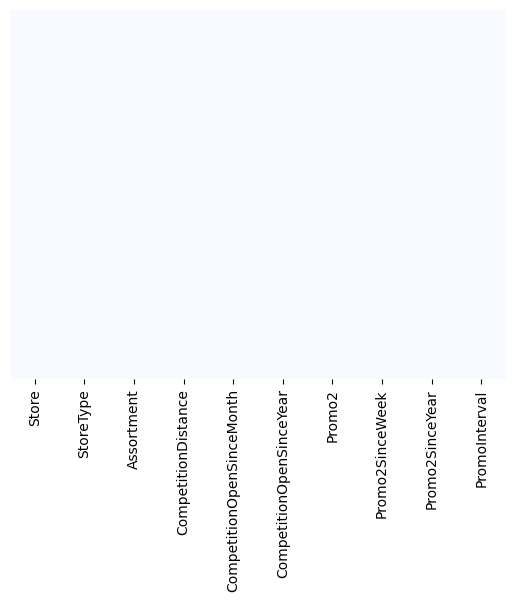

In [22]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

## Merging datasets

In [24]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how='inner', on='Store')

In [25]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [33]:
sales_train_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  float64 

In [31]:
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'], errors='coerce')

### Looking at correlations

In [38]:
correlations = sales_train_all_df.corr(numeric_only=True)['Sales'].sort_values()
correlations


DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<Axes: >

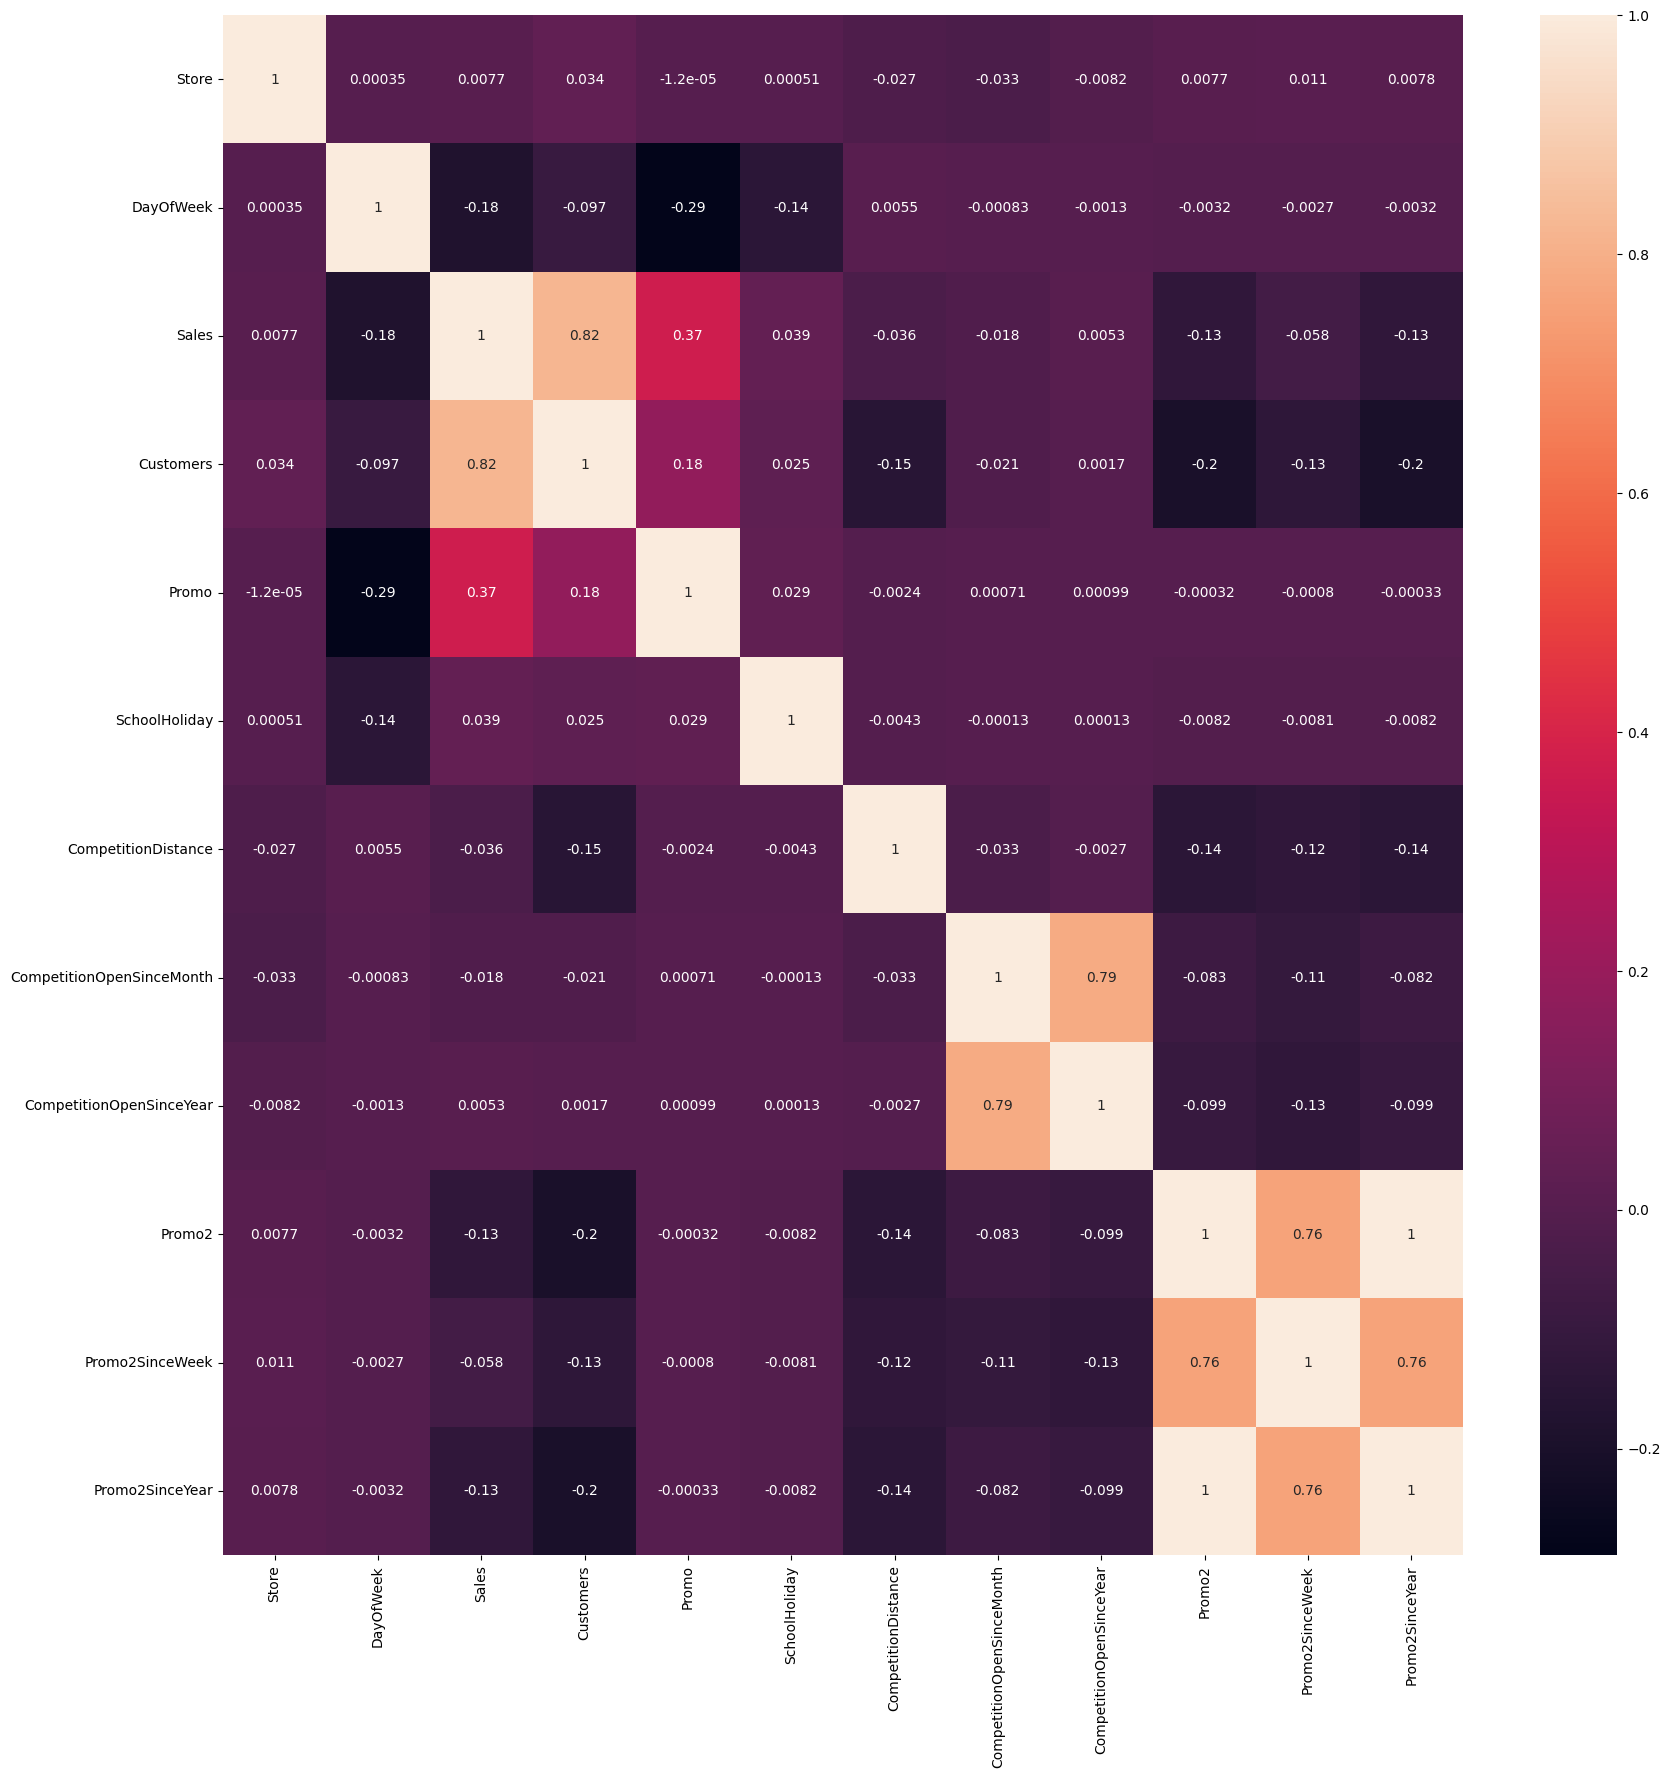

In [40]:
correlations = sales_train_all_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

In [42]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day


In [44]:
sales_train_all_df[['Year','Month',"Day"]]

,Year,Month,Day
0,2015,7,31
1,2015,7,31
2,2015,7,31
3,2015,7,31
4,2015,7,31
...,...,...,...
844387,2013,1,1
844388,2013,1,1
844389,2013,1,1
844390,2013,1,1


## Sales

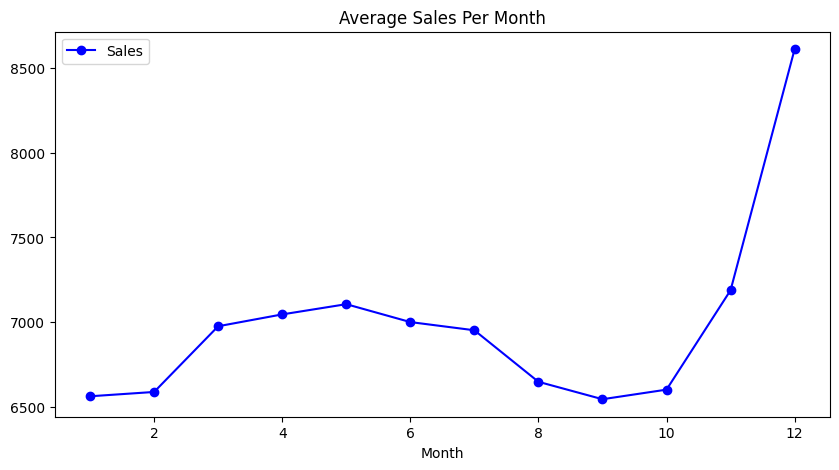

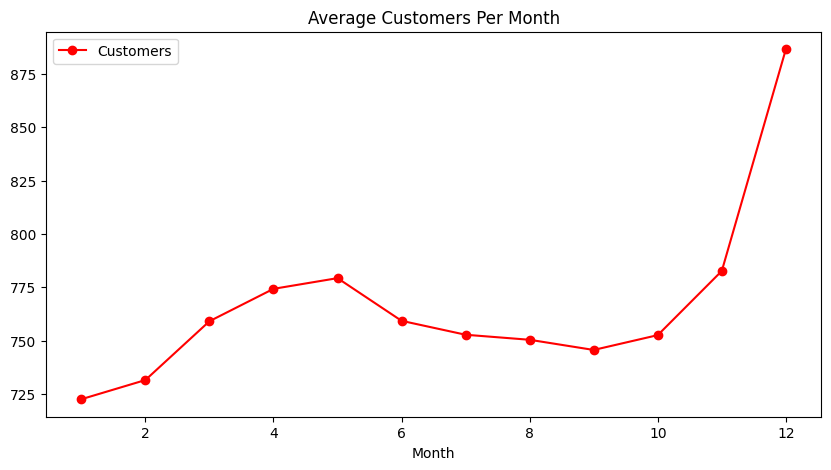

In [54]:
# Average sales and number of customers per month
axis = sales_train_all_df.groupby('Month')['Sales'].mean().plot(figsize=(10,5),
                                                         marker='o',
                                                         color='b')
axis.set_title('Average Sales Per Month')

plt.legend()

plt.figure()

axis = sales_train_all_df.groupby('Month')['Customers'].mean().plot(figsize=(10,5),
                                                         marker='o',
                                                         color='r')
axis.set_title('Average Customers Per Month')

plt.legend()


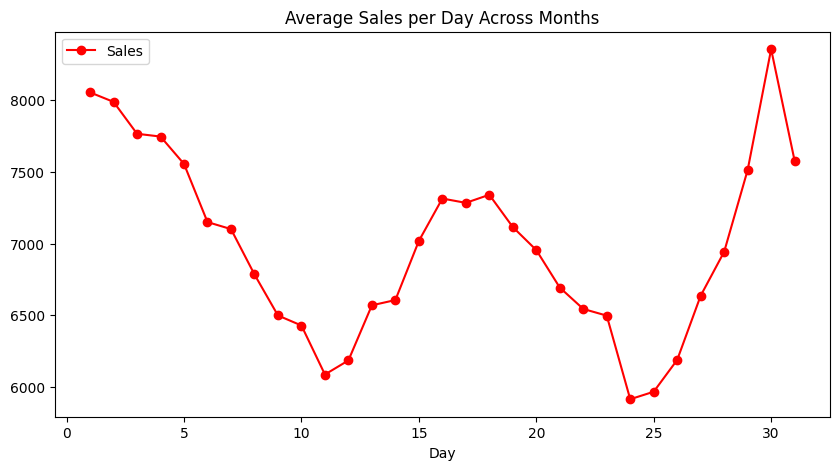

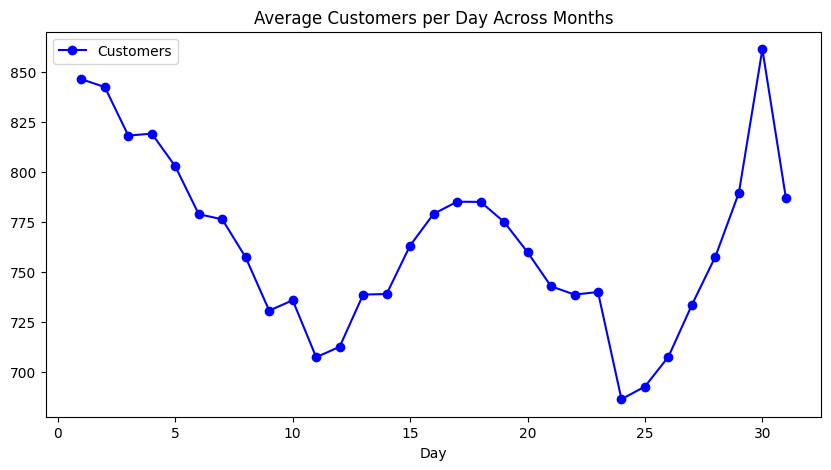

In [61]:
# Average Sales per Day of the Month
axis = sales_train_all_df.groupby('Day')['Sales'].mean().plot(figsize=(10,5),
                                                         marker='o',
                                                         color='r')
axis.set_title('Average Sales per Day Across Months')

plt.legend()


plt.figure()
axis = sales_train_all_df.groupby('Day')['Customers'].mean().plot(figsize=(10,5),
                                                         marker='o',
                                                         color='b')
axis.set_title('Average Customers per Day Across Months')

plt.legend()



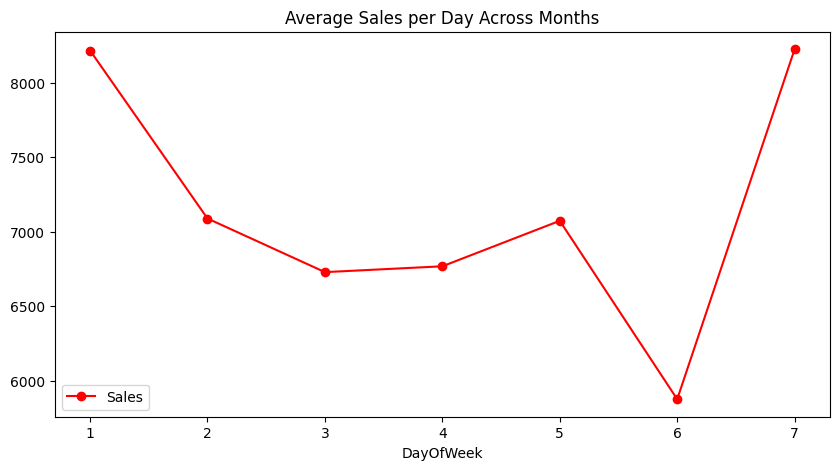

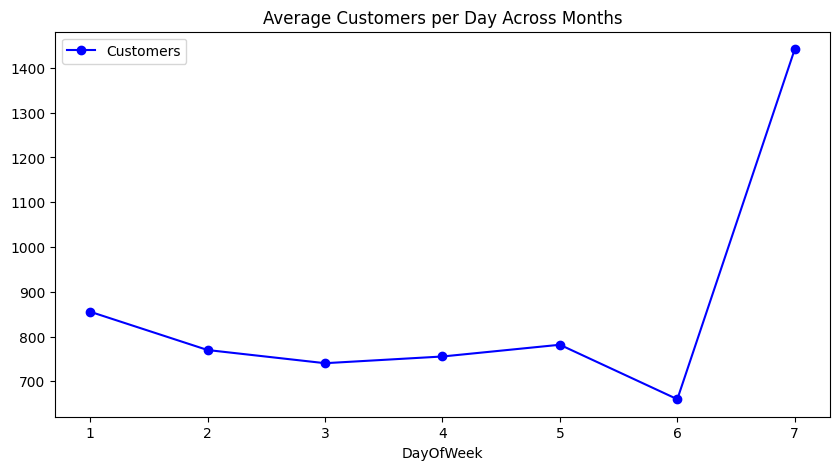

In [64]:
# Average Sales per Day of the Month
axis = sales_train_all_df.groupby('DayOfWeek')['Sales'].mean().plot(figsize=(10,5),
                                                         marker='o',
                                                         color='r')
axis.set_title('Average Sales per Day Of the Week')

plt.legend()


plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')['Customers'].mean().plot(figsize=(10,5),
                                                         marker='o',
                                                         color='b')
axis.set_title('Average Customers per Day Of the Week')

plt.legend()



<Axes: xlabel='Date'>

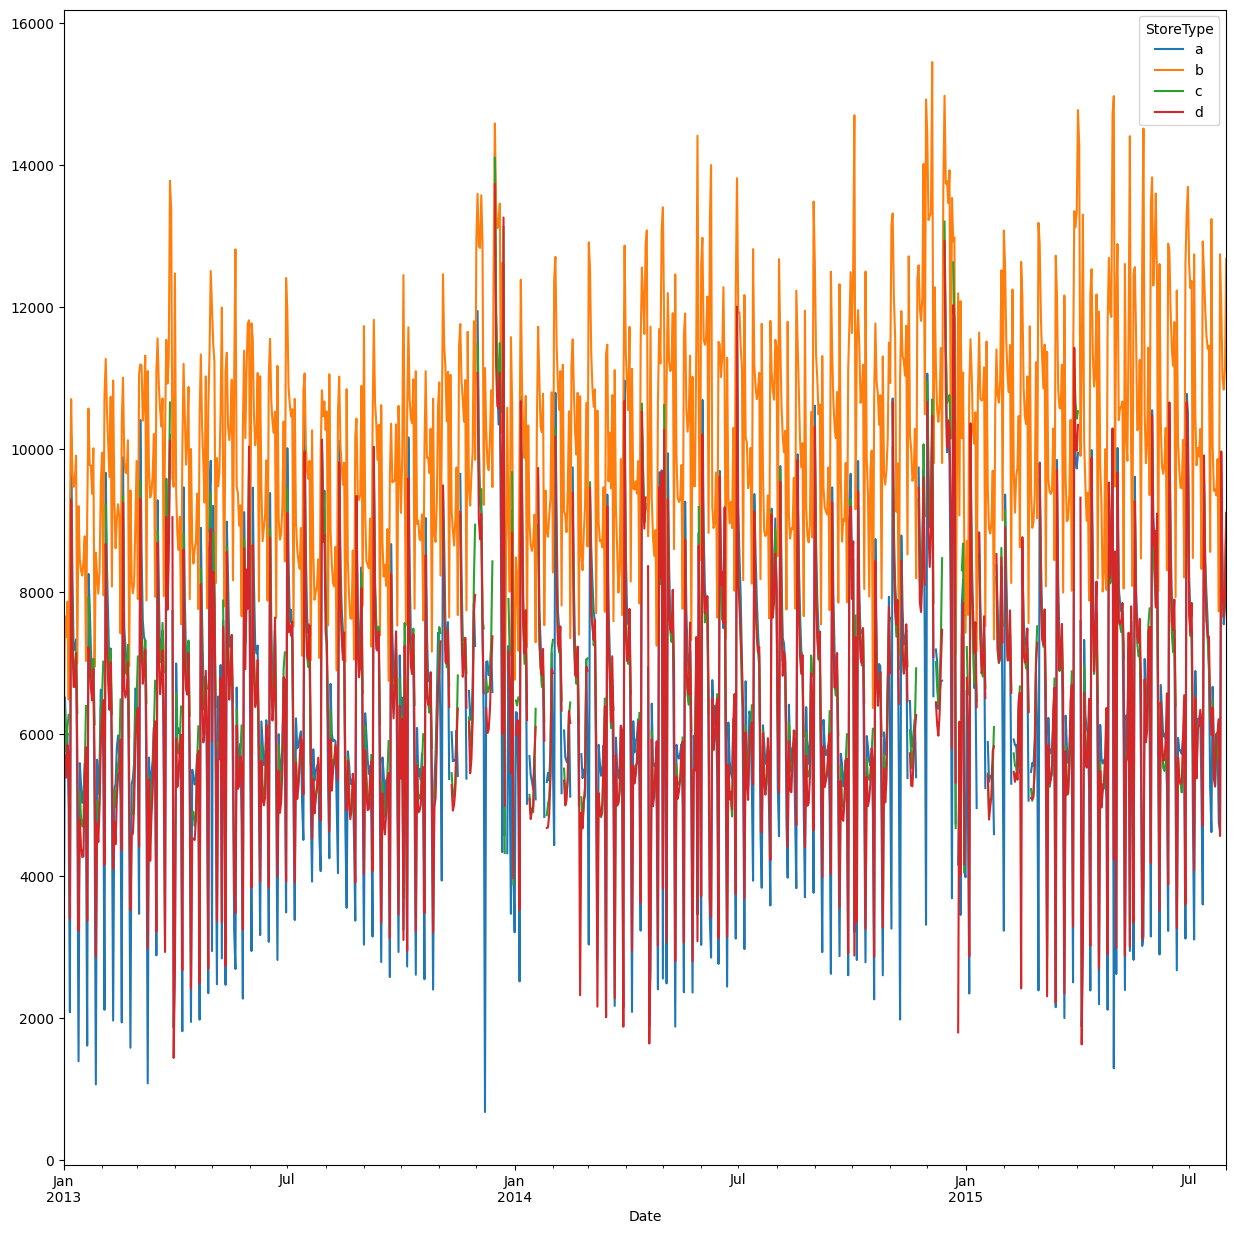

In [78]:
fig, ax = plt.subplots(figsize = (15,15))

sales_train_all_df.groupby(['Date', 'StoreType'])['Sales'].mean().unstack().plot(ax=ax)

<Axes: xlabel='Promo', ylabel='Customers'>

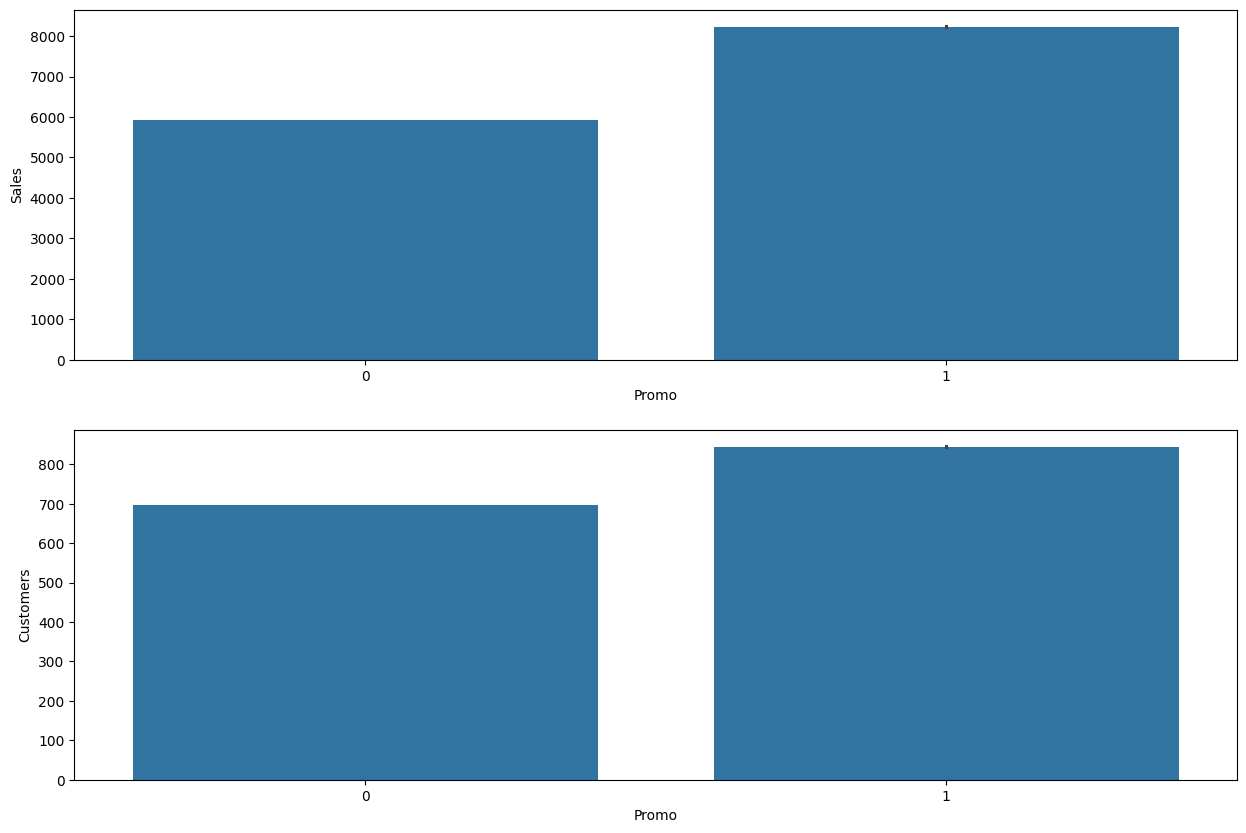

In [80]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x='Promo',
            y='Sales',
            data=sales_train_all_df)


plt.subplot(212)
sns.barplot(x='Promo',
            y='Customers',
            data=sales_train_all_df)

<Axes: xlabel='Promo', ylabel='Customers'>

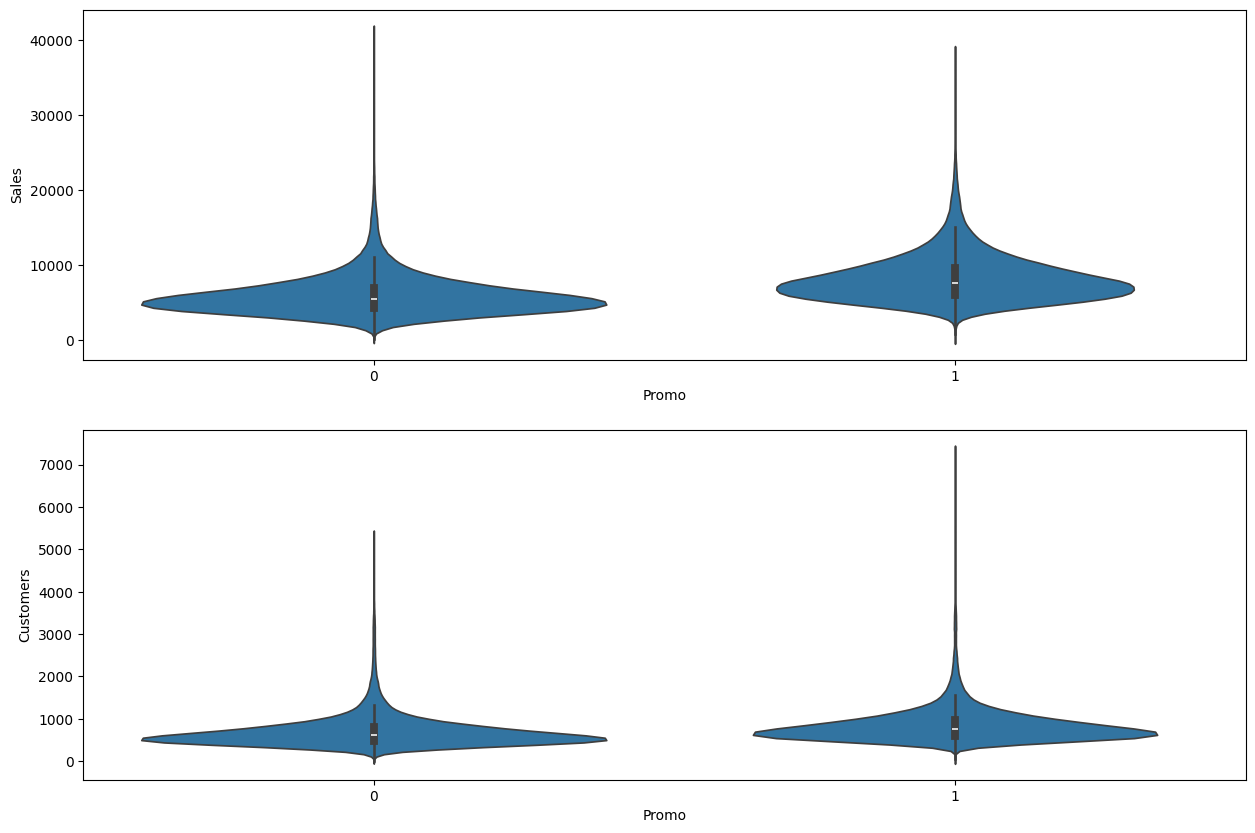

In [81]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x='Promo',
            y='Sales',
            data=sales_train_all_df)


plt.subplot(212)
sns.violinplot(x='Promo',
            y='Customers',
            data=sales_train_all_df)

# Using Facebook Prophet

In [85]:
!pip install prophet

  Using cached holidays-0.58-py3-none-any.whl.metadata (26 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 13.3/13.3 MB 83.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 56.8 MB/s eta 0:00:00


In [87]:
from prophet import Prophet

In [93]:
def sales_predictions(Store_ID, sales_df, periods):

    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date' : 'ds', 'Sales' : 'y'})
    sales_df = sales_df.sort_values('ds')

    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)

00:34:49 - cmdstanpy - INFO - Chain [1] start processing
00:34:49 - cmdstanpy - INFO - Chain [1] done processing


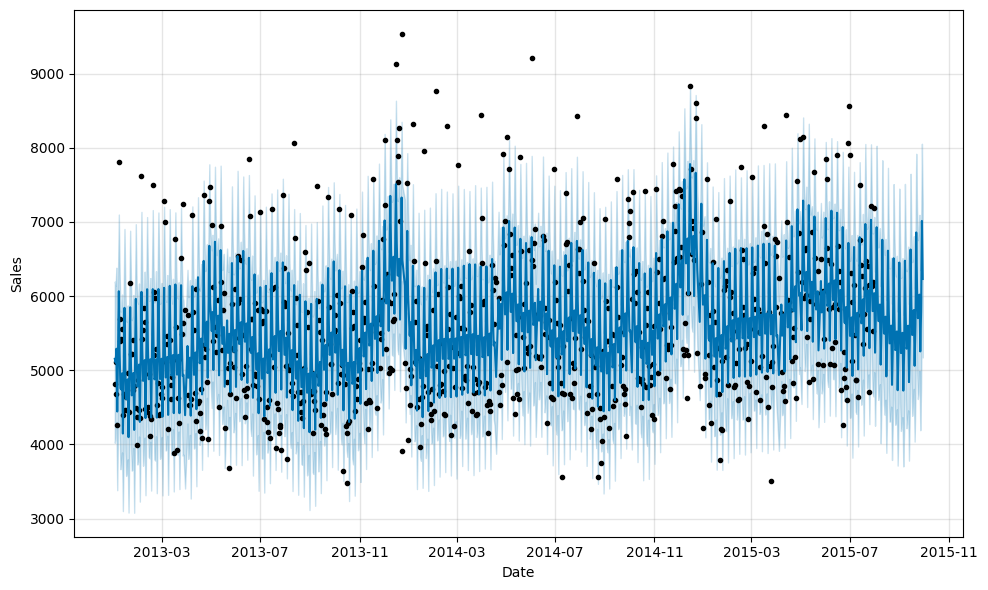

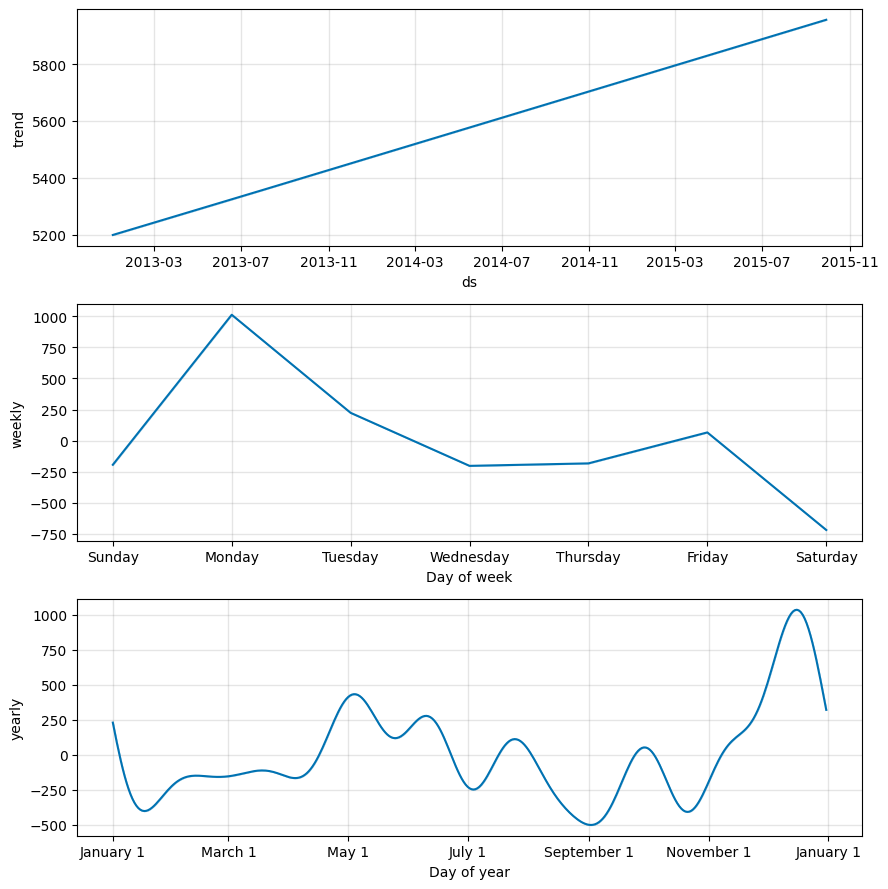

In [94]:
sales_predictions(10, sales_train_all_df, 60)